Used: http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

# Load an example image
img = cv2.imread('test_image.tif')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

<h1> Histogram Streching </h1>

Contrast stretching (often called normalization) is a simple image enhancement technique that attempts to improve the contrast in an image. Te streches the range of intensities in the image so that the whole intensity image range is used.

In [4]:
img.min()

81

In [5]:
img.max()

230

In [6]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

In [7]:
img_rescale.min()

0

In [8]:
img_rescale.max()

255

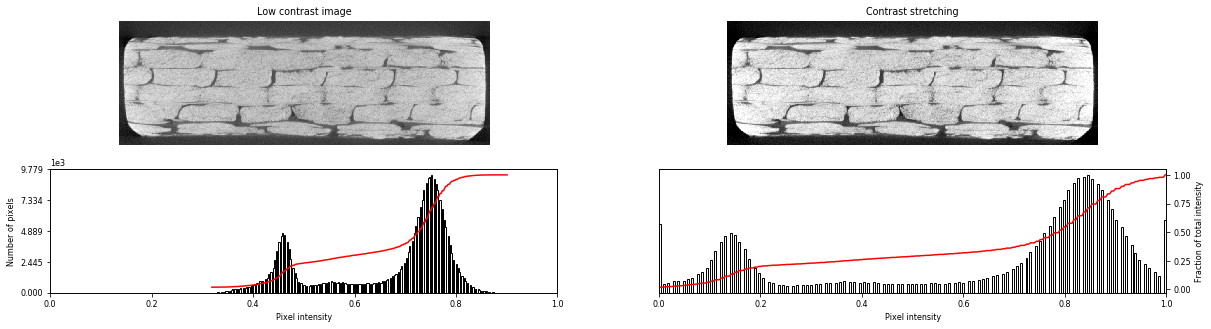

In [9]:
# Display results
fig = plt.figure(figsize=(20, 5))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
for i in range(1, 2):
    axes[0, i] = fig.add_subplot(2, 2, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 2):
    axes[1, i] = fig.add_subplot(2, 2, 3+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

plt.show()

<h1> Histogram Equalization </h1>

Using the image's histogram to improve the contrast of the image. This method redistribute the intensities of the image. It is useful for images with a dark/bright background/foreground.
It is computationally easy, but it may increase the contrast of the noise as well and not the signal.

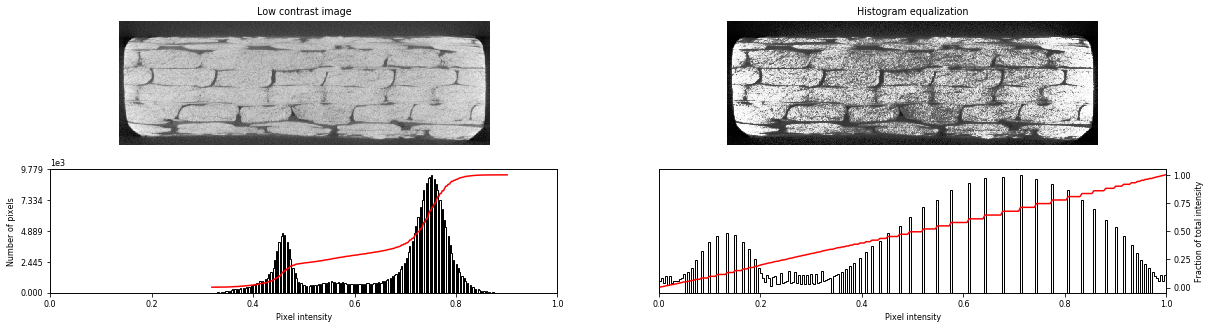

In [10]:
# Display results
fig = plt.figure(figsize=(20, 5))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
for i in range(1, 2):
    axes[0, i] = fig.add_subplot(2, 2, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 2):
    axes[1, i] = fig.add_subplot(2, 2, 3+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

# Equalization
img_eq = exposure.equalize_hist(img)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 1])
ax_img.set_title('Histogram equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

plt.show()

<h1> Adaptative Image Equalization </h1>

A technique used to improve the contrast of an image. It differs from simple histogram equalization in that it computes several histogram corresponding to different sections of the image. It works locally.

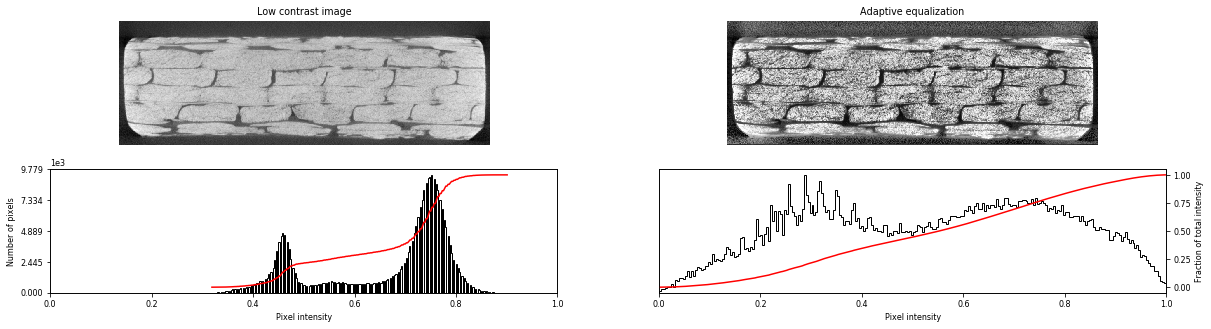

In [11]:
# Display results
fig = plt.figure(figsize=(20, 5))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
for i in range(1, 2):
    axes[0, i] = fig.add_subplot(2, 2, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 2):
    axes[1, i] = fig.add_subplot(2, 2, 3+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 1])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

plt.show()

<h1> Conclusion </h1>

Basically, we are trying to distinguish the fibers and the edges. 
In the original image, two categories of pixels are already visible. We could try to classify them from this point, but it could be better to first transform the image so that the whole range of intensity is used.
Histogram Equalization and it adaptative version are not really helpful in the fact that they flatten the histogram and try to "dissolve" our clusters.
However, using histogram stretching which do not change the overall structure of the histogram could be a good idea.